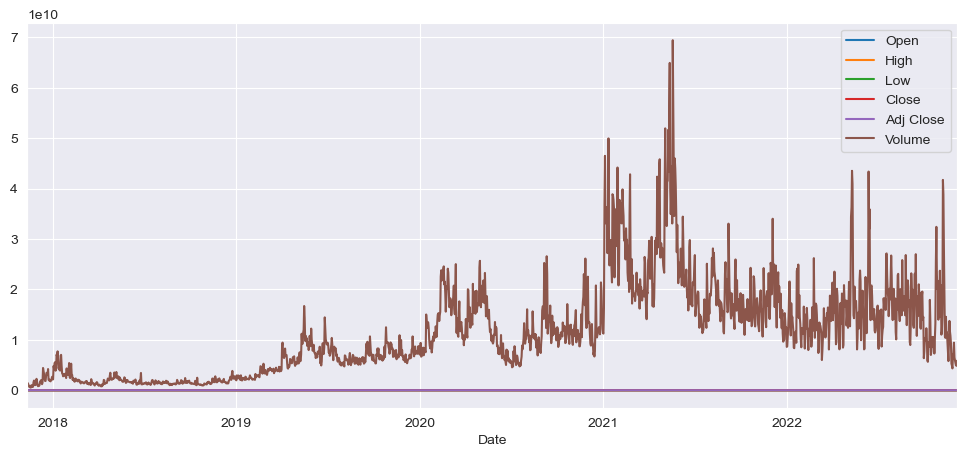

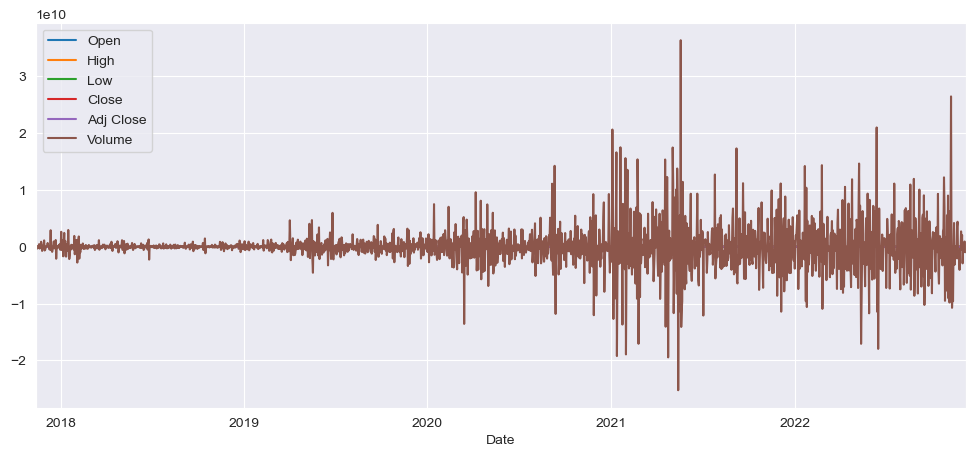

(-10.523996647538706,
 9.521296785074494e-19,
 16,
 1835,
 {'1%': -3.4339186491956246,
  '5%': -2.8631163592632403,
  '10%': -2.5676091993407035},
 20584.25659774033)

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# Daten einlesen
df = pd.read_csv('ETH-EUR_11_11_2017-07_12_2022.csv', index_col='Date', parse_dates=True)
df.index.freq = 'D'

# Daten plotten
df.plot(figsize=(12,5))
plt.show()

# Daten auf Stationarität prüfen
adfuller(df['Close'])

# Daten differenzieren
df_diff = df.diff()
df_diff = df_diff.dropna()

# Daten plotten
df_diff.plot(figsize=(12,5))
plt.show()

# Daten auf Stationarität prüfen
adfuller(df_diff['Close'])

# # ACF und PACF plotten
# plot_acf(df_diff, lags=np.arange(len(df_diff) - 1))
# plot_pacf(df_diff,lags=np.arange(len(df_diff) - 1))
# plt.show()



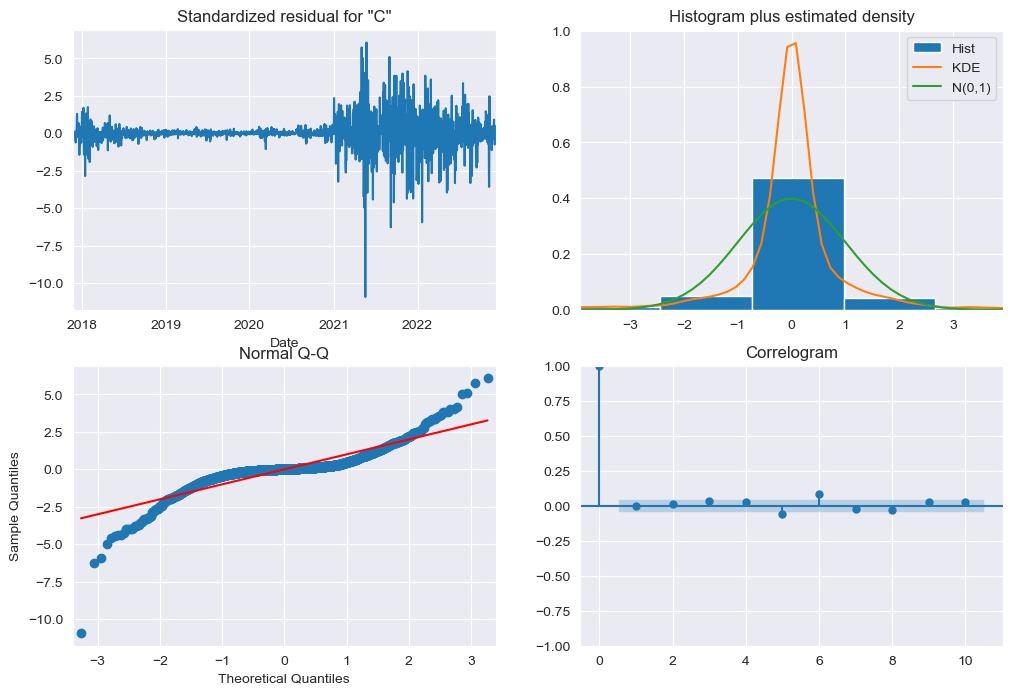

In [10]:
# SARIMA Modell erstellen
model = SARIMAX(df['Close'], order=(0,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Modell auswerten
results.summary()

# Modell plotten
results.plot_diagnostics(figsize=(12,8))
plt.show()



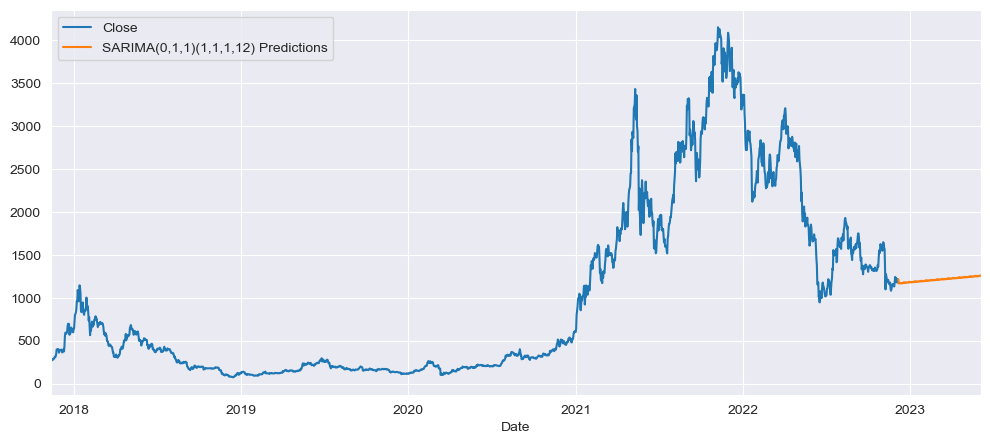

In [12]:
# Vorhersage erstellen
start = len(df_diff)
end = len(df_diff) + 180
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(0,1,1)(1,1,1,12) Predictions')

# Vorhersage plotten
df['Close'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)
plt.show()



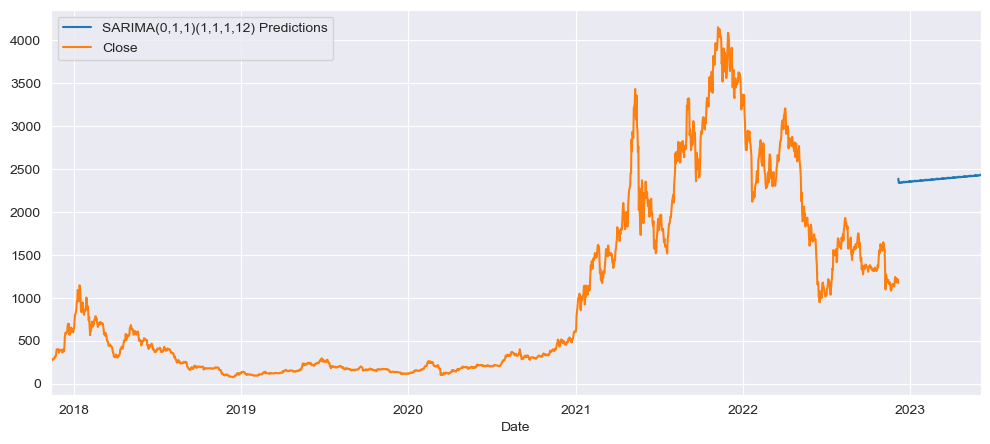

In [13]:
# Vorhersage auf Originaldaten zurückrechnen
df_pred = df['Close'].iloc[-1] + predictions
df_pred.plot(figsize=(12,5), legend=True)
df['Close'].plot(legend=True)
plt.show()


In [23]:

# RMSE berechnen
rmse = sqrt(mean_squared_error(df['Close'], df_pred))
print(rmse)



ValueError: Found input variables with inconsistent numbers of samples: [1853, 181]